## Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('water_potability_AdityaKadiwal.csv')

fillWithMean = df.apply(lambda col: col.fillna(col.mean()), axis=0)

# Use the remove_null DataFrame, not the original DataFrame (df)
X = fillWithMean.drop(columns=['Potability'])
y = fillWithMean['Potability']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

In [5]:
depths = range(1,21)
acc_depth = []
acc_depth_as = []

In [6]:
for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc_depth_as.append([accuracy_score(y_test, y_pred)])
    acc_depth.append(dt.score(X_test, y_test))

print('scores :', acc_depth)

print('accuracy_scores :', acc_depth_as)

scores : [0.6266531027466938, 0.6286876907426246, 0.6327568667344863, 0.6368260427263479, 0.641912512716175, 0.6612410986775178, 0.6500508646998983, 0.6449643947100712, 0.6459816887080366, 0.6286876907426246, 0.6215666327568667, 0.6174974567650051, 0.602238046795524, 0.6113936927772126, 0.6012207527975585, 0.612410986775178, 0.5971515768056969, 0.6002034587995931, 0.590030518819939, 0.5910478128179044]
accuracy_scores : [[0.6266531027466938], [0.6286876907426246], [0.6327568667344863], [0.6368260427263479], [0.641912512716175], [0.6612410986775178], [0.6500508646998983], [0.6449643947100712], [0.6459816887080366], [0.6286876907426246], [0.6215666327568667], [0.6174974567650051], [0.602238046795524], [0.6113936927772126], [0.6012207527975585], [0.612410986775178], [0.5971515768056969], [0.6002034587995931], [0.590030518819939], [0.5910478128179044]]


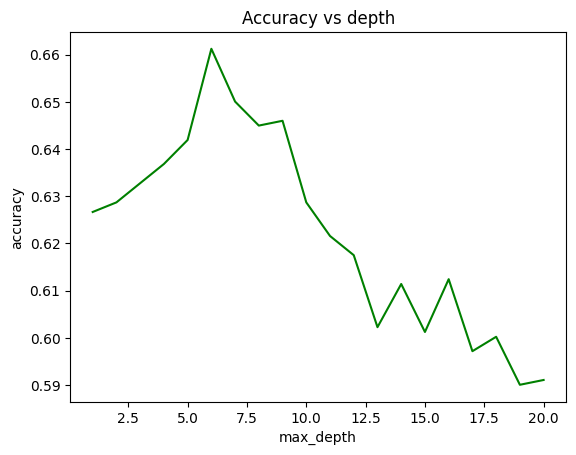

In [7]:
plt.plot(depths, acc_depth, color='green')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuracy vs depth')
plt.show()

In [8]:
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Highest accuracy 66.10000000000001% at depth 6


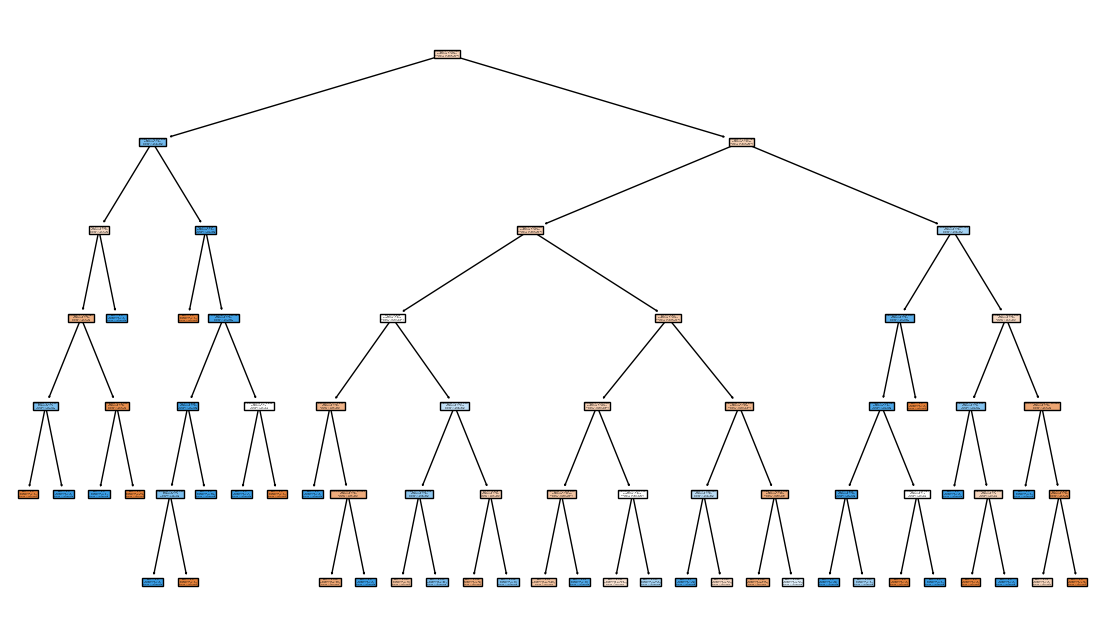

In [9]:
plt.figure(figsize=(14,8))
dt = DecisionTreeClassifier(random_state = 1, max_depth = best_depth)
dt.fit(X_train, y_train)
tree.plot_tree(dt, feature_names = X_train.columns,  
               class_names = ['Europe', 'Oceania'],
                filled=True)
plt.show()

In [10]:
# dtree = DecisionTreeClassifier(max_depth=9)

In [11]:
# dtree_depth = dtree.fit(X_train, y_train,)
# print(f'Decision Tree depth: {dtree.get_depth()}')

In [12]:
# dtree_score = dtree.score(X_test, y_test)
# print(f'Test set accuracy tree: {dtree_score}')